# Naive Bayes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
Classifier = GaussianNB()
Classifier.fit(X_train,Y_train)

GaussianNB()

In [12]:
print(Classifier.predict(sc.transform([[30,187000]])))

[1]


In [13]:
Y_pred = Classifier.predict(X_test)
Y_pred = Y_pred.reshape(len(Y_pred),1)
Y_test = Y_pred.reshape(len(Y_test),1)
print(np.concatenate((Y_pred,Y_test),axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [14]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [15]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
acc=accuracy_score(Y_test,Y_pred)
print(acc)

[[59  0]
 [ 0 21]]
1.0


In [16]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


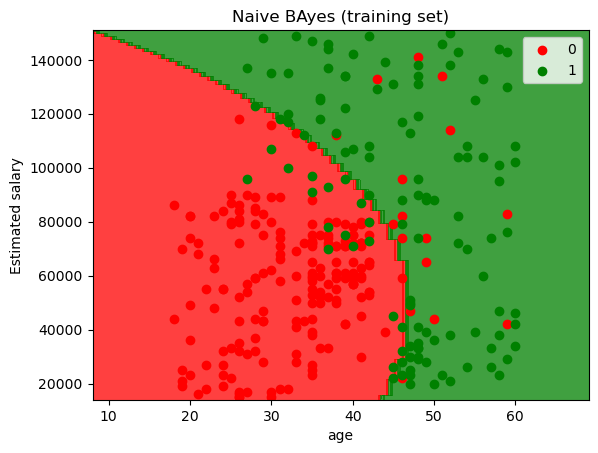

In [20]:
X_set,Y_set=sc.inverse_transform(X_train),Y_train
x1,x2 = np.meshgrid(np.arange(start=X_set[:,0].min() -10 , stop=X_set[:,0].max() +10, step=1),
                    np.arange(start=X_set[:,1].min() -1000 , stop=X_set[:,1].max() +1000, step=1))
plt.contourf(x1,x2,Classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha= 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0], X_set[Y_set == j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive BAyes (training set)')
plt.xlabel('age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()